# Regression practice (Zindi logistics challenge)

Import libraries

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor


#Test model accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



Import data sets

The _trainset_ dataset will be used to train the model,and the _testset_ dataset will be used to deploy the model

In [109]:
trainset = pd.read_csv('Training dataset.csv')
testset = pd.read_csv('Test dataset.csv')

In [110]:
trainset.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


Check for missing data and fill them in with the mean

In [111]:
trainset.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [112]:
trainset.isnull().sum()

print((trainset['Temperature'].isnull().sum())/len(trainset['Temperature'])*100)
print((trainset['Precipitation in millimeters'].isnull().sum())/len(trainset['Precipitation in millimeters'])*100)

20.593368237347295
97.39634922880997


The _Precipitation_ column would have been worth including in the model but it had over 90% of the values missing, therefore it was excluded. The model was fit with only _Distance_ as the predictor variable

In [113]:
precip_mean = trainset['Precipitation in millimeters'].mean()

trainset['Precipitation in millimeters'] = trainset['Precipitation in millimeters'].fillna(precip_mean)

Draw a distribution plot for Time to pickup

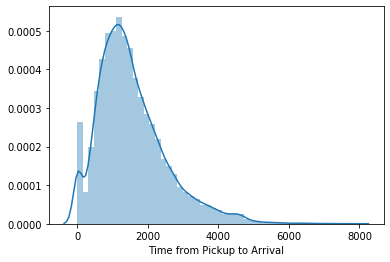

In [114]:
sns.distplot(trainset['Time from Pickup to Arrival'])

Remove outliers from the _Distance_ column 

In [115]:
first_quartile = trainset['Distance (KM)'].describe()['25%']
third_quartile = trainset['Distance (KM)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
trainset = trainset[(trainset['Distance (KM)'] > (first_quartile - 3 * iqr)) &
            (trainset['Distance (KM)'] < (third_quartile + 3 * iqr))]

Select independent variables and the dependent variable to train the model

In [116]:
#train = trainset[['Distance (KM)', 'Precipitation in millimeters', 'Time from Pickup to Arrival']]
X = trainset[['Distance (KM)']].values
y = trainset[['Time from Pickup to Arrival']].values

X_train = X_train.reshape(len(X_train), 1)
y_train = y_train.reshape(len(y_train), 1)

Split the dataset into training and testing data

In [117]:
#Split the dataset into a training set and a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [118]:
#Feature scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
#print(X_train)
#print(y_train)

Try fitting different models to see which one performs better

1. SVR model

In [119]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\zintl\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Predict test set variable

In [120]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))

Test model accuracy (R squared and RMSE)

In [121]:
print('R squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R squared: 0.3351830841774155
RMSE: 801.1781681450899


2. Simple linear regression model

In [122]:
lm = LinearRegression()

In [123]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
y_pred = sc_y.inverse_transform(lm.predict(sc_X.transform(X_test)))

In [125]:
print('R squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R squared: 0.3527375801289012
RMSE: 790.5298477005864


3. Decision tree model

In [126]:
r_tree = DecisionTreeRegressor(max_depth=3)

In [127]:
r_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [128]:
y_pred = sc_y.inverse_transform(r_tree.predict(sc_X.transform(X_test)))

In [129]:
print('R squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R squared: 0.3561633199765797
RMSE: 788.4350694779973


The models tried above have a large RMSE, ensemble methods will be used next to improve the score

Model stacking

In [130]:
#pip install --user --upgrade scikit-learn==0.22

In [131]:
models = [("LR",lm),("DT",r_tree),("SVR",regressor)]

meta_learner = LinearRegression()
s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner)

In [132]:
s_reg.fit(X_train,y_train[:,0])

StackingRegressor(cv=None,
                  estimators=[('LR',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('DT',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=3,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,


In [133]:
y_pred = sc_y.inverse_transform(s_reg.predict(sc_X.transform(X_test)))

In [134]:
print('R squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R squared: 0.3609095826072678
RMSE: 785.5235842046546


In [135]:
meh = testset.iloc[:, 17:18].values
meh

array([[ 8],
       [ 5],
       [ 5],
       ...,
       [10],
       [18],
       [ 8]], dtype=int64)

In [136]:
testset.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [137]:
pred = sc_y.inverse_transform(s_reg.predict(sc_X.transform(meh)))

In [138]:
testset['Time from Pickup to arrival'] = pred
prediction = testset[['Order No', 'Time from Pickup to arrival']]
prediction.to_csv("Test_50.csv", index=False)
prediction.head()

,Order No,Time from Pickup to arrival
0,Order_No_19248,1497.360754
1,Order_No_12736,1103.684102
2,Order_No_768,1103.684102
3,Order_No_15332,1103.684102
4,Order_No_21373,1266.039877
